In [1]:
import os
import random
import typing

import numpy as np
import matplotlib.pyplot as plt
import skimage
import scipy.ndimage
import cv2
import six
import SimpleITK as sitk
import radiomics

In [2]:
def texture_features(image, mask, extractor, y_only: bool=False):
    if y_only==False:
        # image_gt = rgb2ycbcr(image_gt)
        for image_channel in range(image.shape[2]):
            image_1channel = image[:,:,image_channel]
            image_1channel_stk = sitk.GetImageFromArray(image_1channel)

            features_1channel = extractor.execute(image_1channel_stk, mask, label=255)

            if image_channel == 0:
                info: typing.Dict(typing.Union(str,typing.Any)) = {feature: features_1channel[feature] for feature in features_1channel.keys() if not feature.startswith("original")}
                features: typing.Dict(typing.Union(str,typing.Any)) = {feature: [] for feature in features_1channel.keys() if feature.startswith("original")}

            for feature in features.keys():
                features[feature].append(features_1channel[feature])

        for feature in features.keys():
            features[feature] = np.mean(features[feature])

    else:
        image_1channel = image[:,:,1]
        image_1channel_stk = sitk.GetImageFromArray(image_1channel)

        features_1channel = extractor.execute(image_1channel_stk, mask, label=255)

        info: typing.Dict(typing.Union(str,typing.Any)) = {feature: features_1channel[feature] for feature in features_1channel.keys() if not feature.startswith("original")}
        features: typing.Dict(typing.Union(str,typing.Any)) = {feature: float(features_1channel[feature]) for feature in features_1channel.keys() if feature.startswith("original")}
    
    return features

In [13]:
def plot_images(img1, img2):
    plt.figure(figsize=(30,20))
    ax1 = plt.subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax2 = plt.subplot(122)
    ax2.imshow(img2, cmap="gray")
    plt.show()

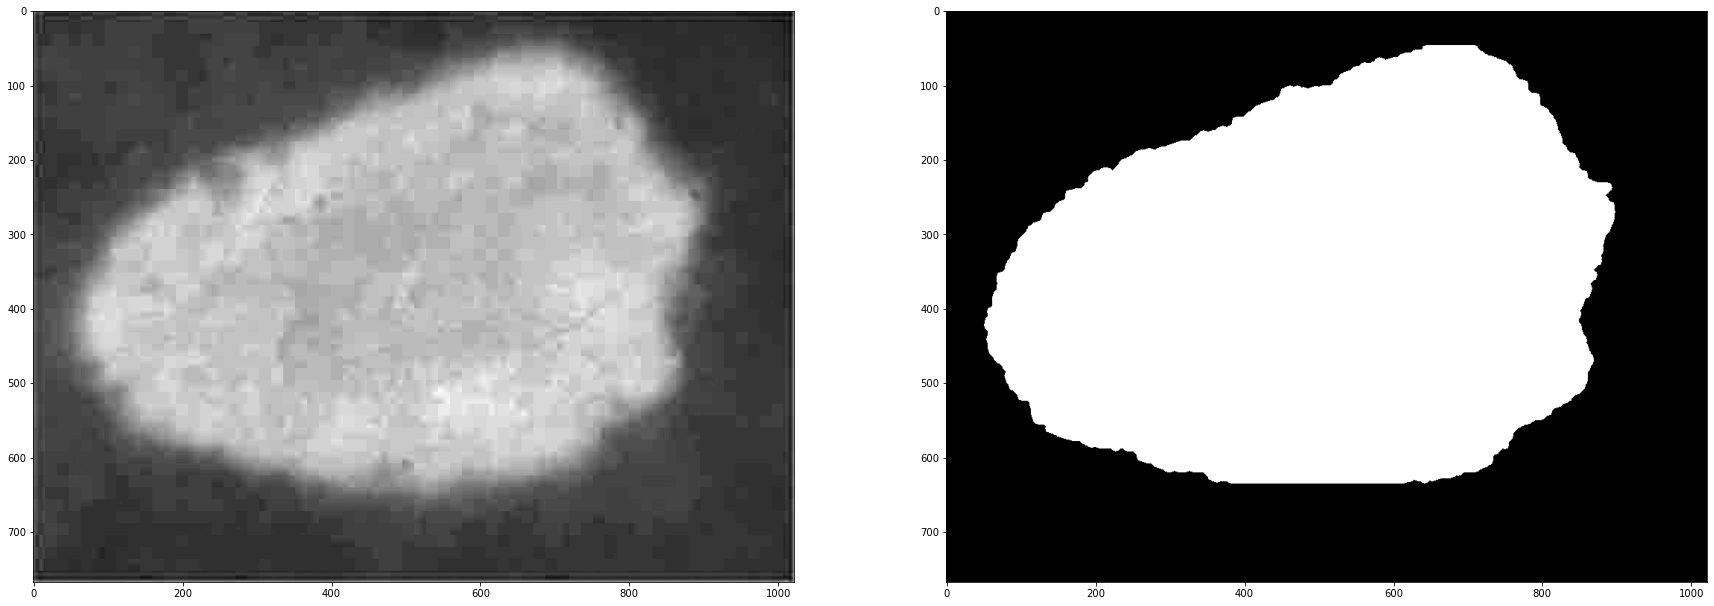

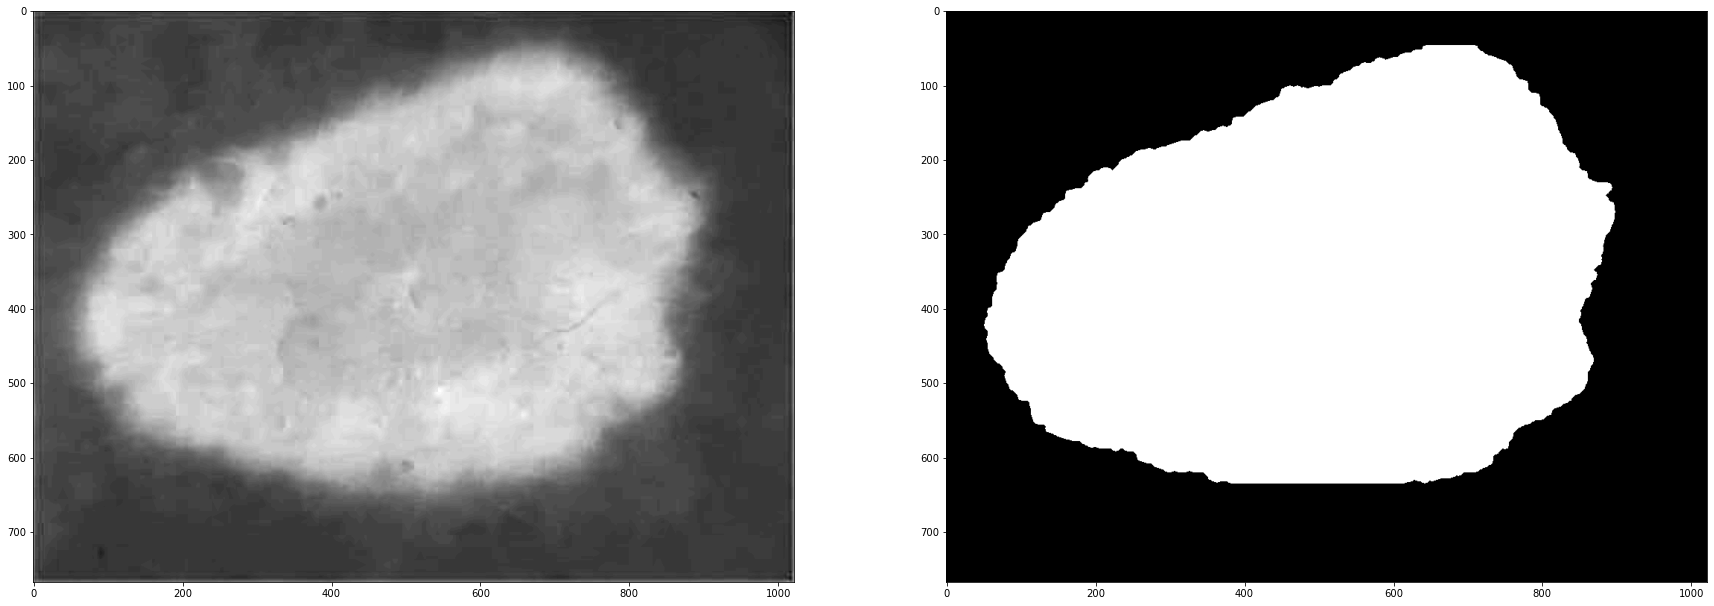

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
d:\ProgramFiles\anaconda3\envs\texture\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Legend does not support 'G' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
d:\ProgramFiles\anaconda3\envs\texture\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


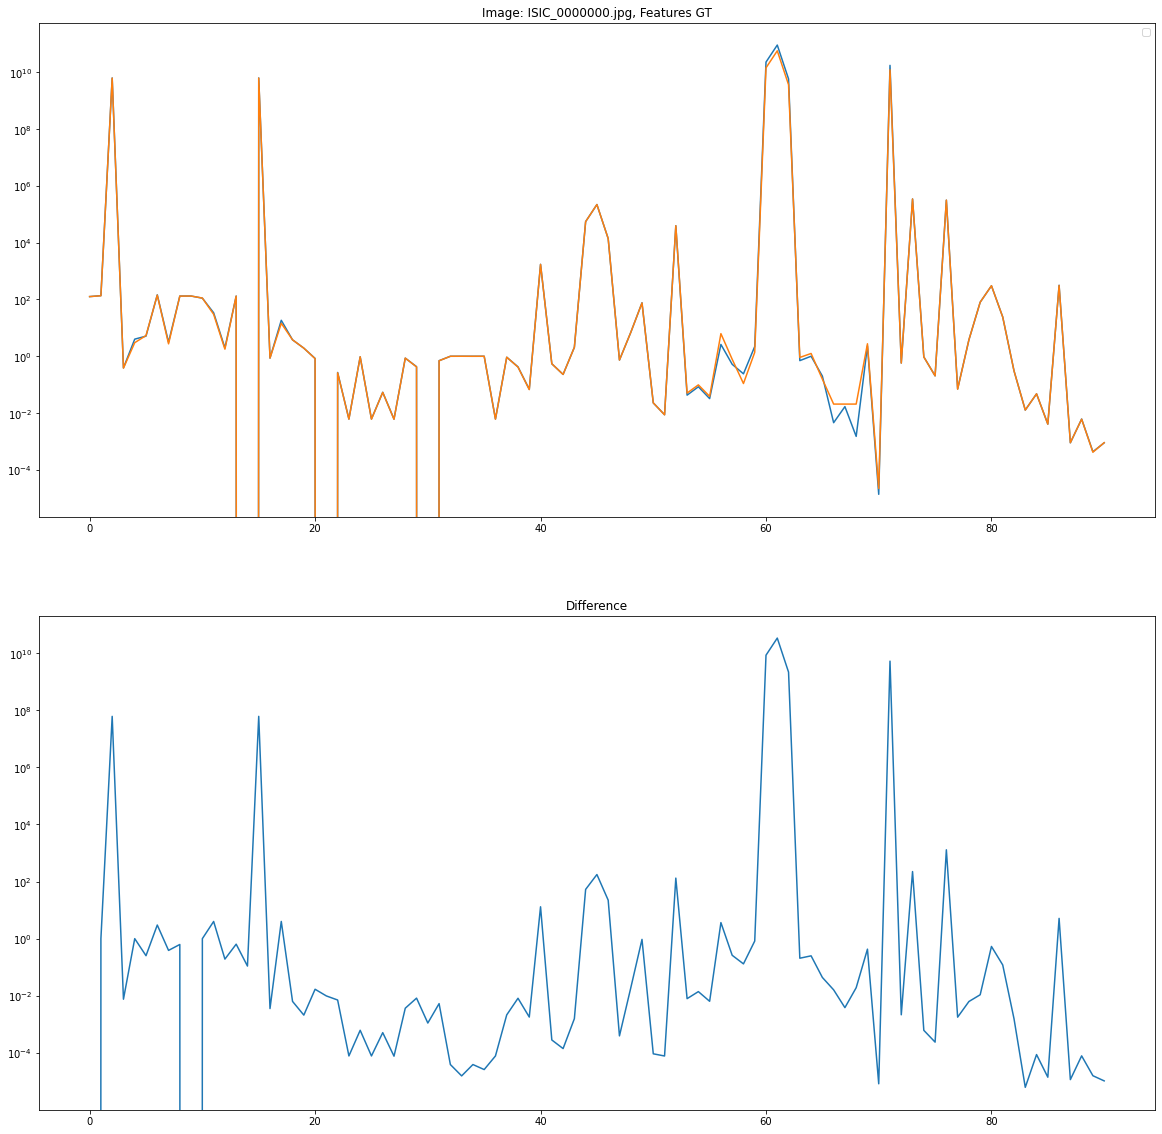

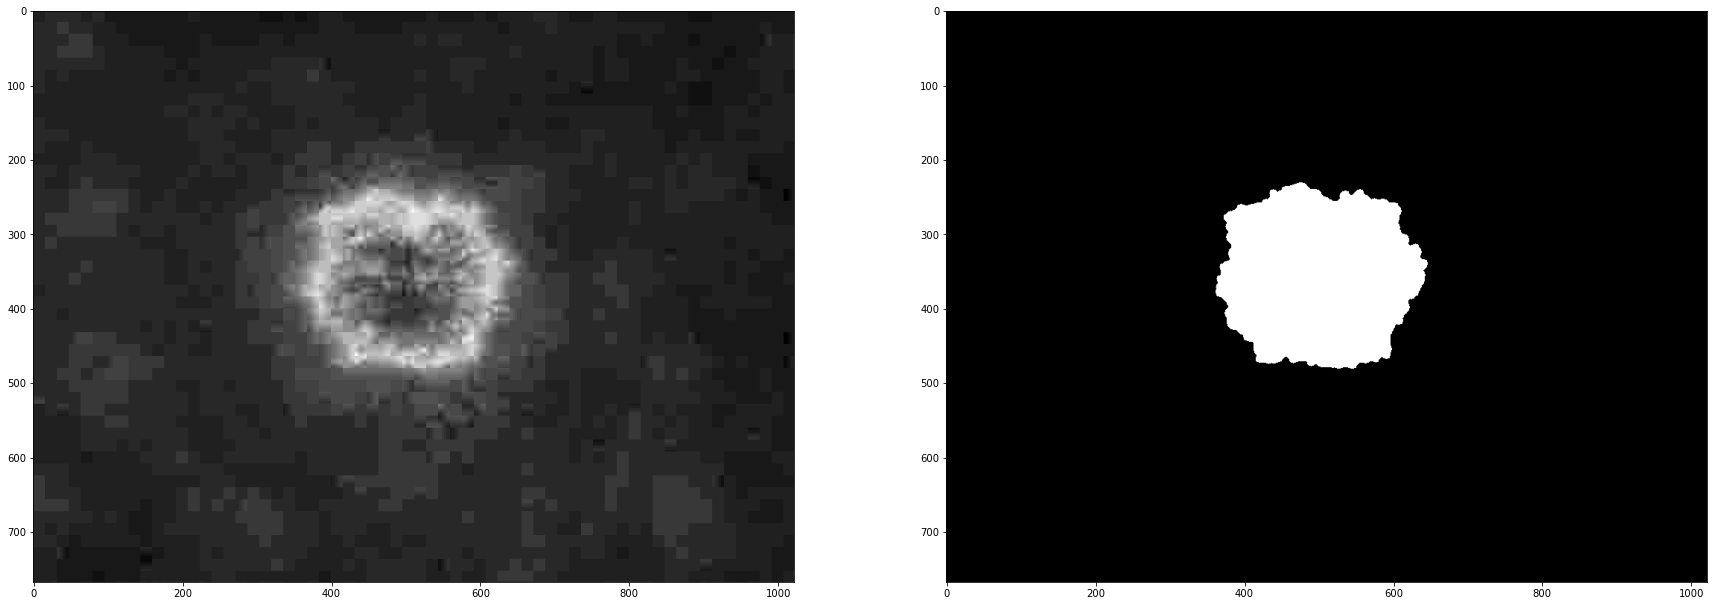

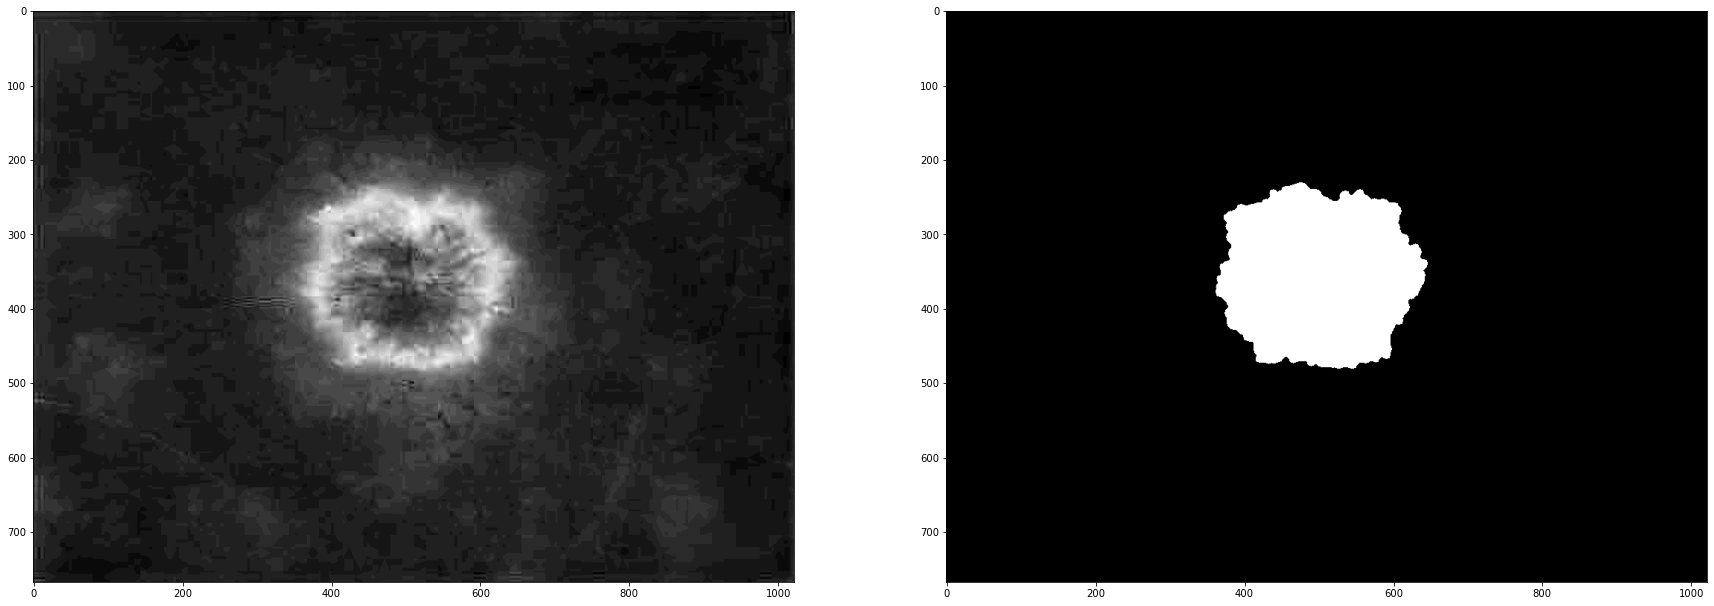

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input


KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

In [20]:

params: str = "D:/DOMI/University/Thesis/Coding/Scripts/texture_analysis/dermaTextureAnalysis.yaml"
extractor = radiomics.featureextractor.RadiomicsFeatureExtractor(params)      # Instantiate the extractor

image_dataset = "ISBI2016_ISIC_Part1_Training_Data"
mask_dataset = "ISBI2016_ISIC_Part1_Training_GroundTruth"

path_image_gt: str = f"D:/DOMI/University/Thesis/Coding/Dataset/Texture_analysis/gt_images"
path_mask_gt: str = f"D:/DOMI/University/Thesis/Coding/Dataset/Texture_analysis/gt_masks"

path_image_sr: str = f"D:/DOMI/University/Thesis/Coding/Dataset/Texture_analysis/sr_images"  
path_mask_sr: str = f"D:/DOMI/University/Thesis/Coding/Dataset/Texture_analysis/sr_masks"

images_filenames_gt: typing.List[str] = os.listdir(path_image_gt)
masks_filenames_gt: typing.List[str] = os.listdir(path_mask_gt)

images_filenames_sr: typing.List[str] = os.listdir(path_image_sr)
masks_filenames_sr: typing.List[str] = os.listdir(path_mask_sr)

for image_filename_gt, mask_filename_gt, image_filename_sr, mask_filename_sr  in zip(images_filenames_gt, masks_filenames_gt, images_filenames_sr, masks_filenames_sr):

    image_path_gt = os.path.join(path_image_gt, image_filename_gt)
    image_path_sr = os.path.join(path_image_sr, image_filename_sr)
    mask_path = os.path.join(path_mask_gt, mask_filename_gt)
    
    image_gt = cv2.imread(image_path_gt)
    image_gt = cv2.cvtColor(image_gt, cv2.COLOR_BGR2YCrCb)
    image_sr = cv2.imread(image_path_sr)
    image_sr = cv2.cvtColor(image_sr, cv2.COLOR_BGR2YCrCb)
    mask = sitk.ReadImage(mask_path, sitk.sitkUInt32)  # imageIO="PNGImageIO"

    plot_images(image_gt[:,:,1], sitk.GetArrayFromImage(mask))
    plot_images(image_sr[:,:,1], sitk.GetArrayFromImage(mask))

    features_gt = texture_features(image_gt, mask, extractor, y_only=True)
    features_sr = texture_features(image_sr, mask, extractor, y_only=True)

    features_gt_list = [features_gt[key] for key in features_gt.keys()]
    features_sr_list = [features_sr[key] for key in features_sr.keys()]
    features_dist = list(np.abs(np.array(features_gt_list) - np.array(features_sr_list)))
    t = range(0, len(features_dist))

    plt.figure(figsize=(20,20))
    plt.subplot(211)
    plt.plot(t,features_gt_list, t,features_sr_list)
    # plt.ylim([0, 100])
    plt.yscale("log")
    plt.title(f"Image: {image_filename_gt}, Features GT")
    plt.legend("GT", "SR")
            
    # plt.subplot(312)
    # plt.plot(features_sr_list)
    # plt.ylim([0, 100])
    # plt.title(f"Image: {image_filename_sr}, Features SR")

    plt.subplot(212)
    plt.plot(features_dist)
    plt.yscale("log")
    plt.title("Difference")
    plt.show()


In [ ]:
    # myList = features_gt.items()
    # myList = sorted(myList) 
    # x, y = zip(*myList)
   
    # plt.figure(figsize=(50,50))
    # plt.plot(x, y)
    # plt.show()